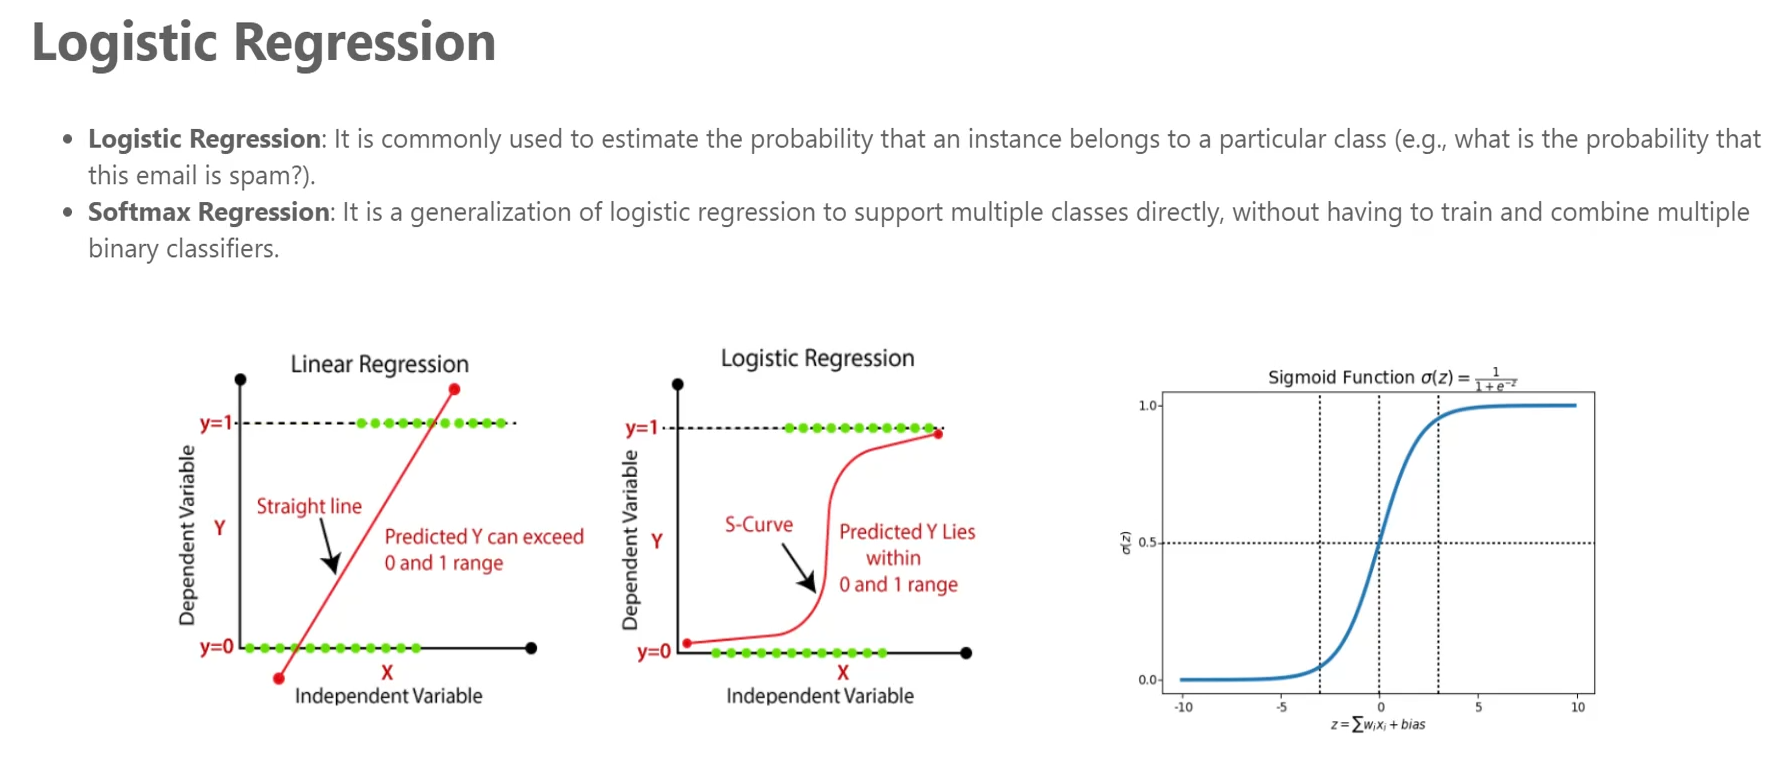

![cost logit.PNG](<attachment:cost logit.PNG>)
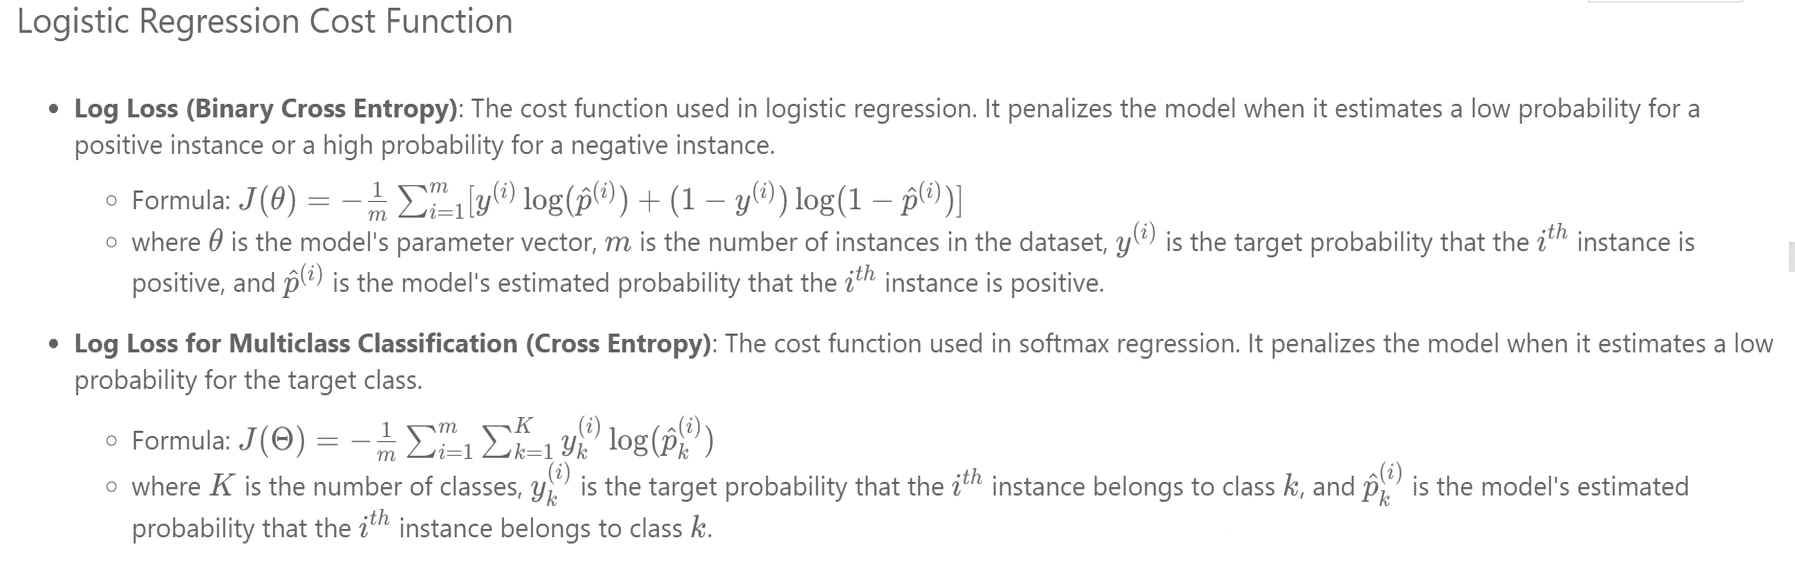

![lin vs logi.PNG](<attachment:lin vs logi.PNG>)
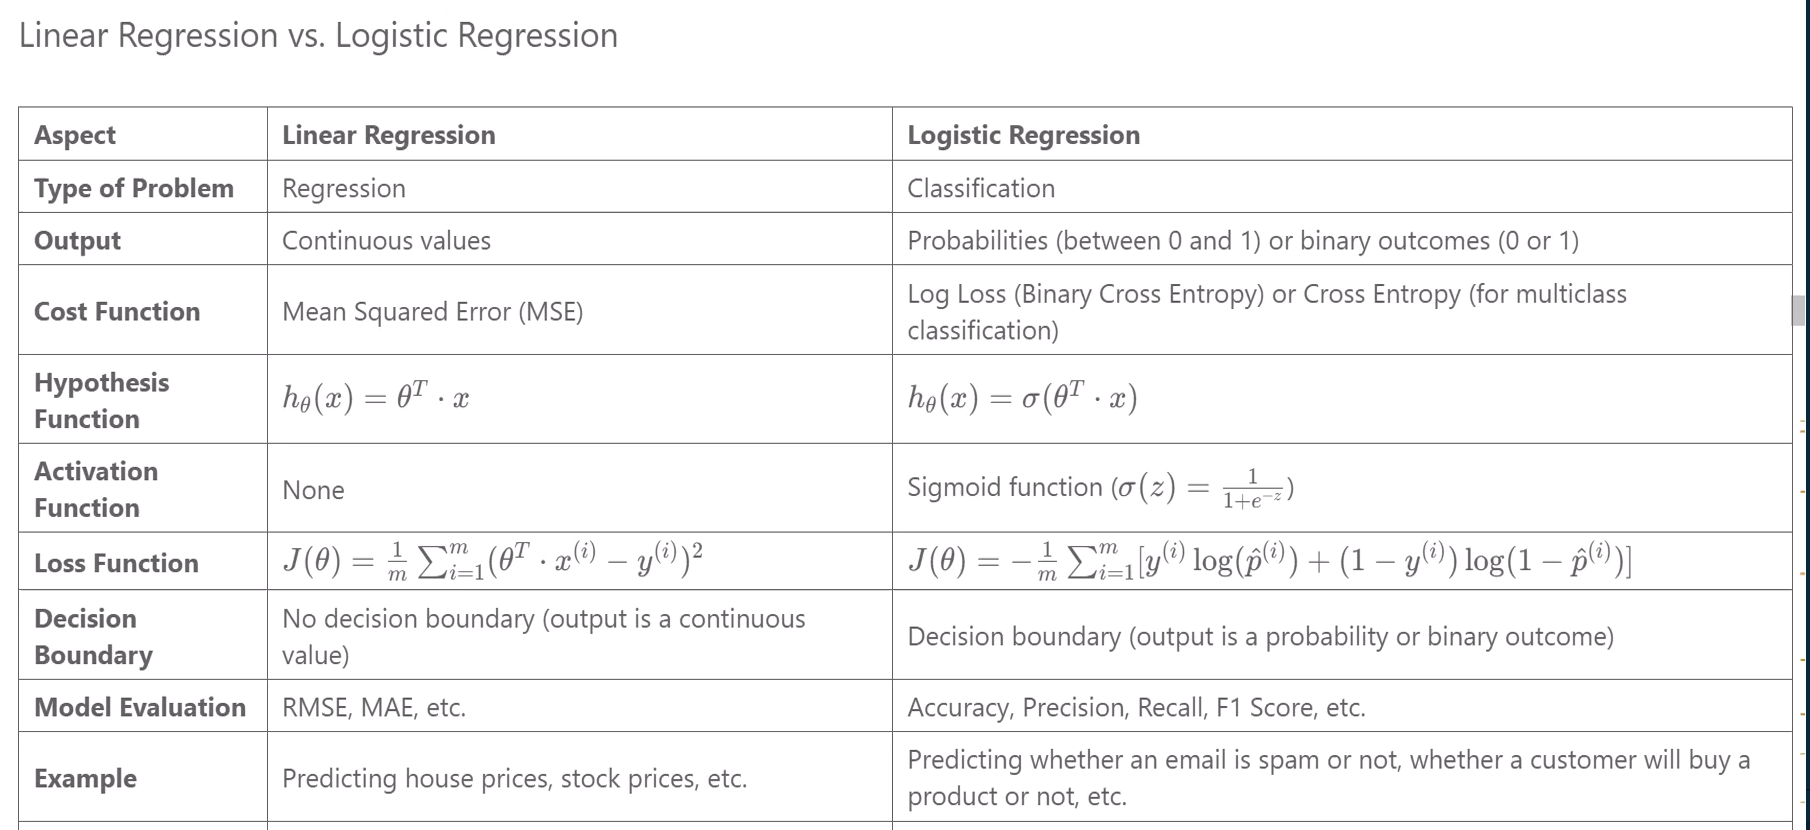

![lin vs logi 1.PNG](<attachment:lin vs logi 1.PNG>)
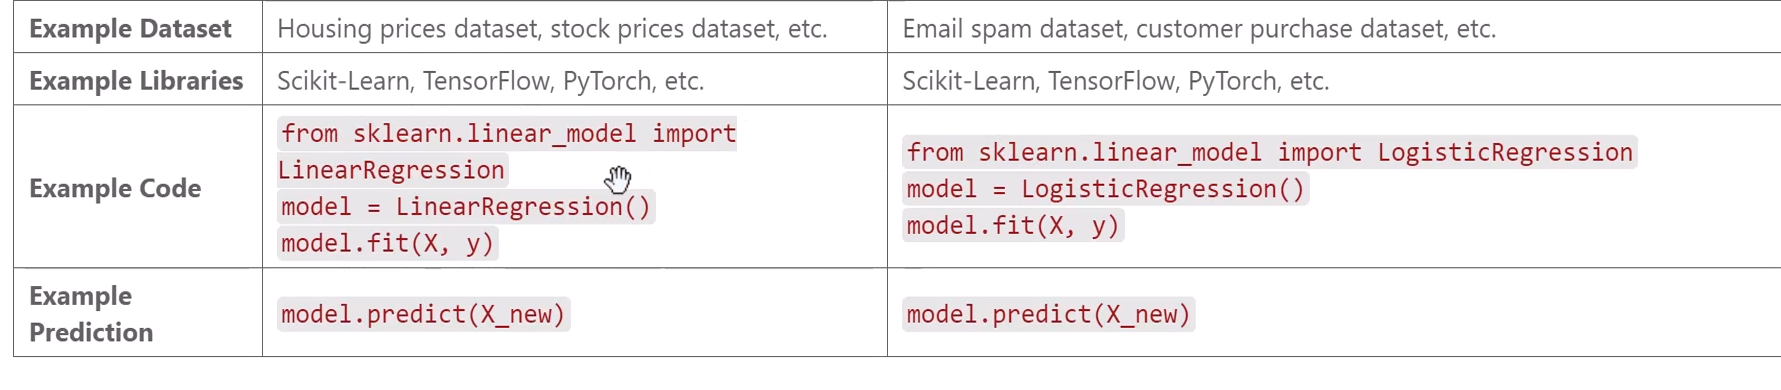

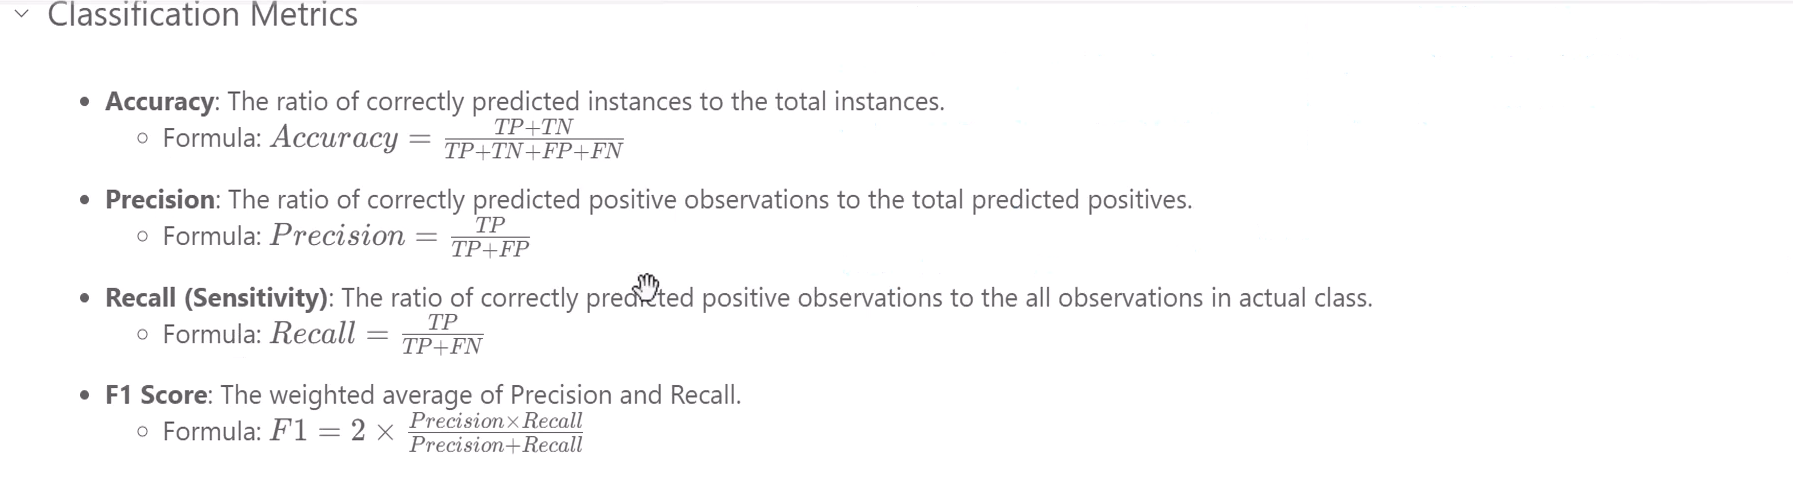

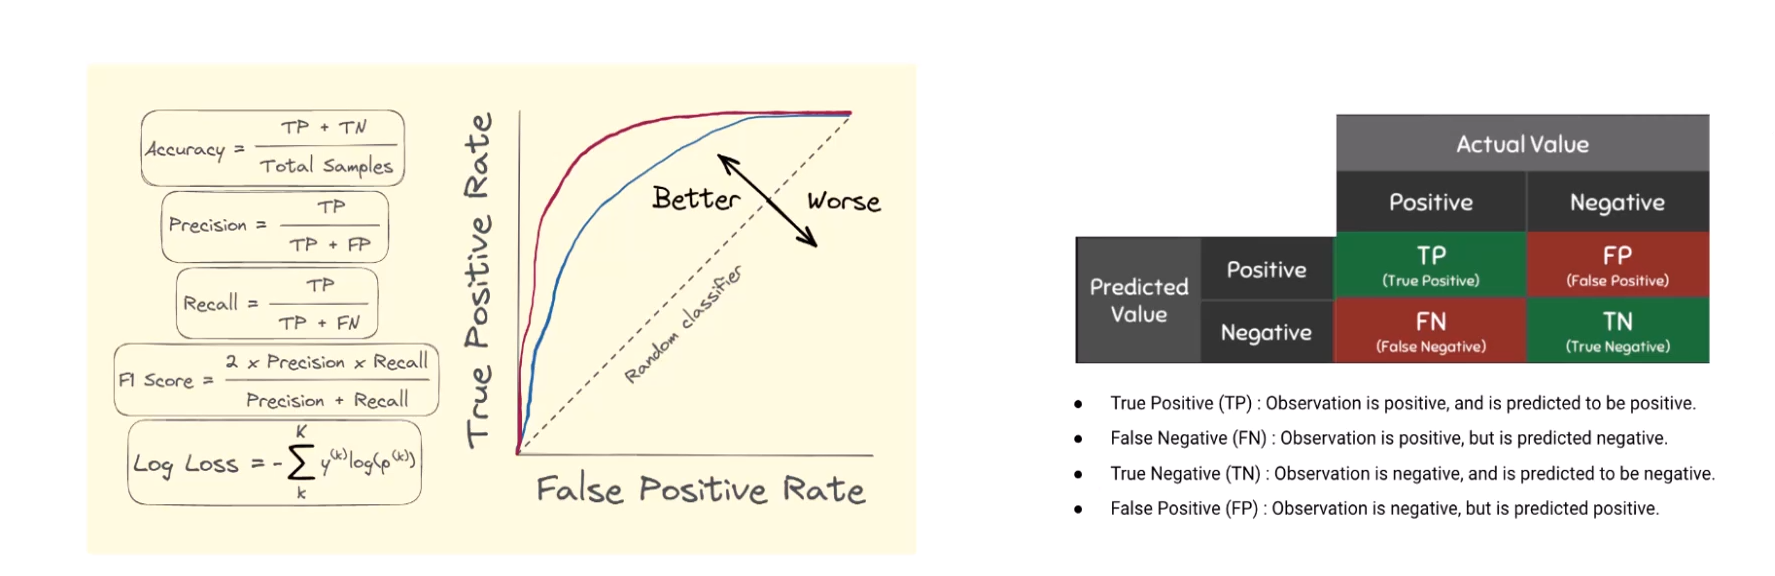

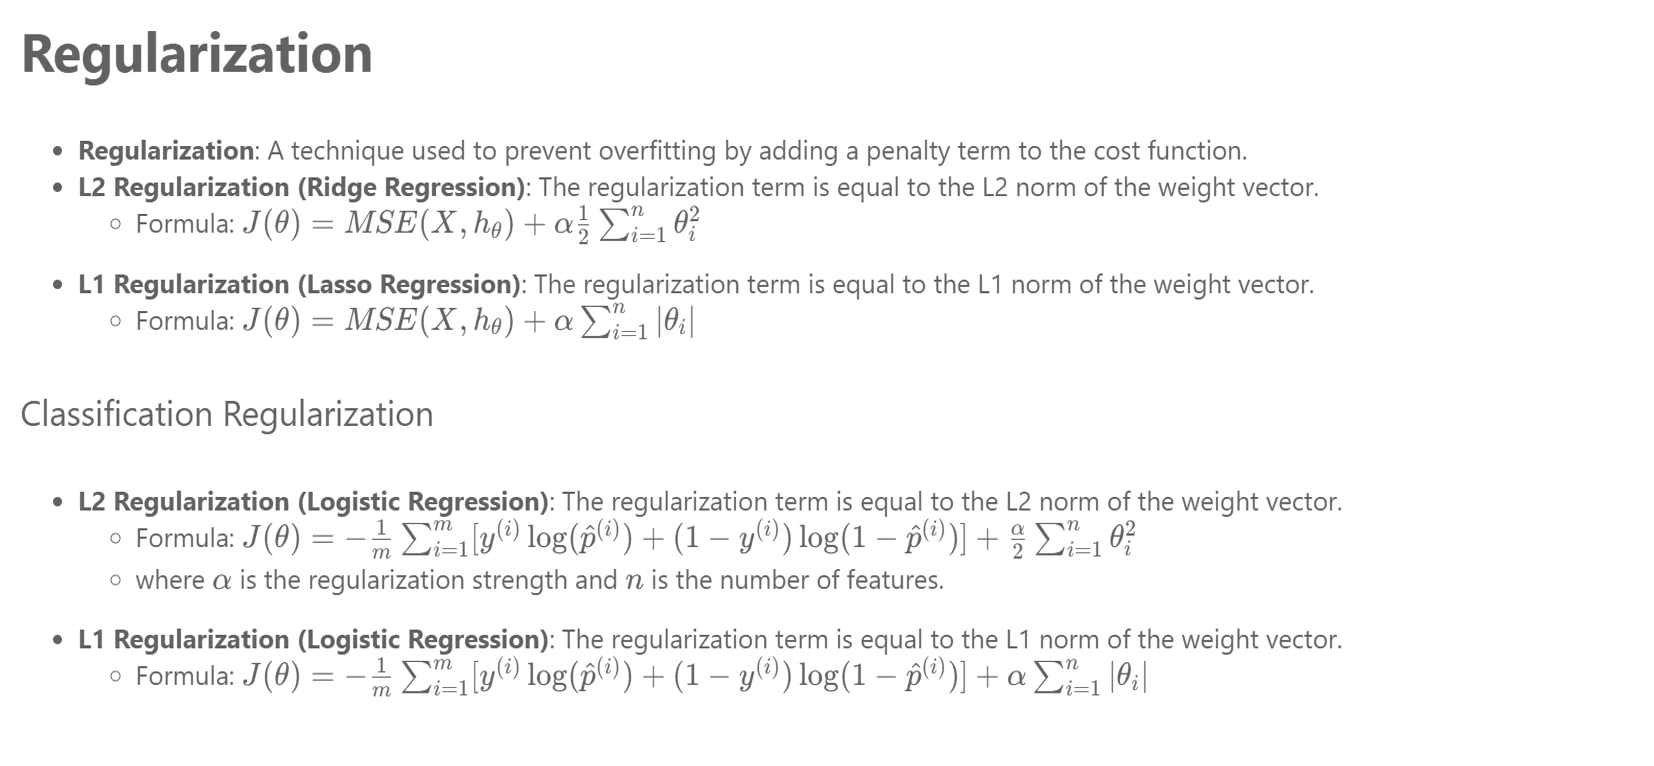

![regu fig.PNG](<attachment:regu fig.PNG>)
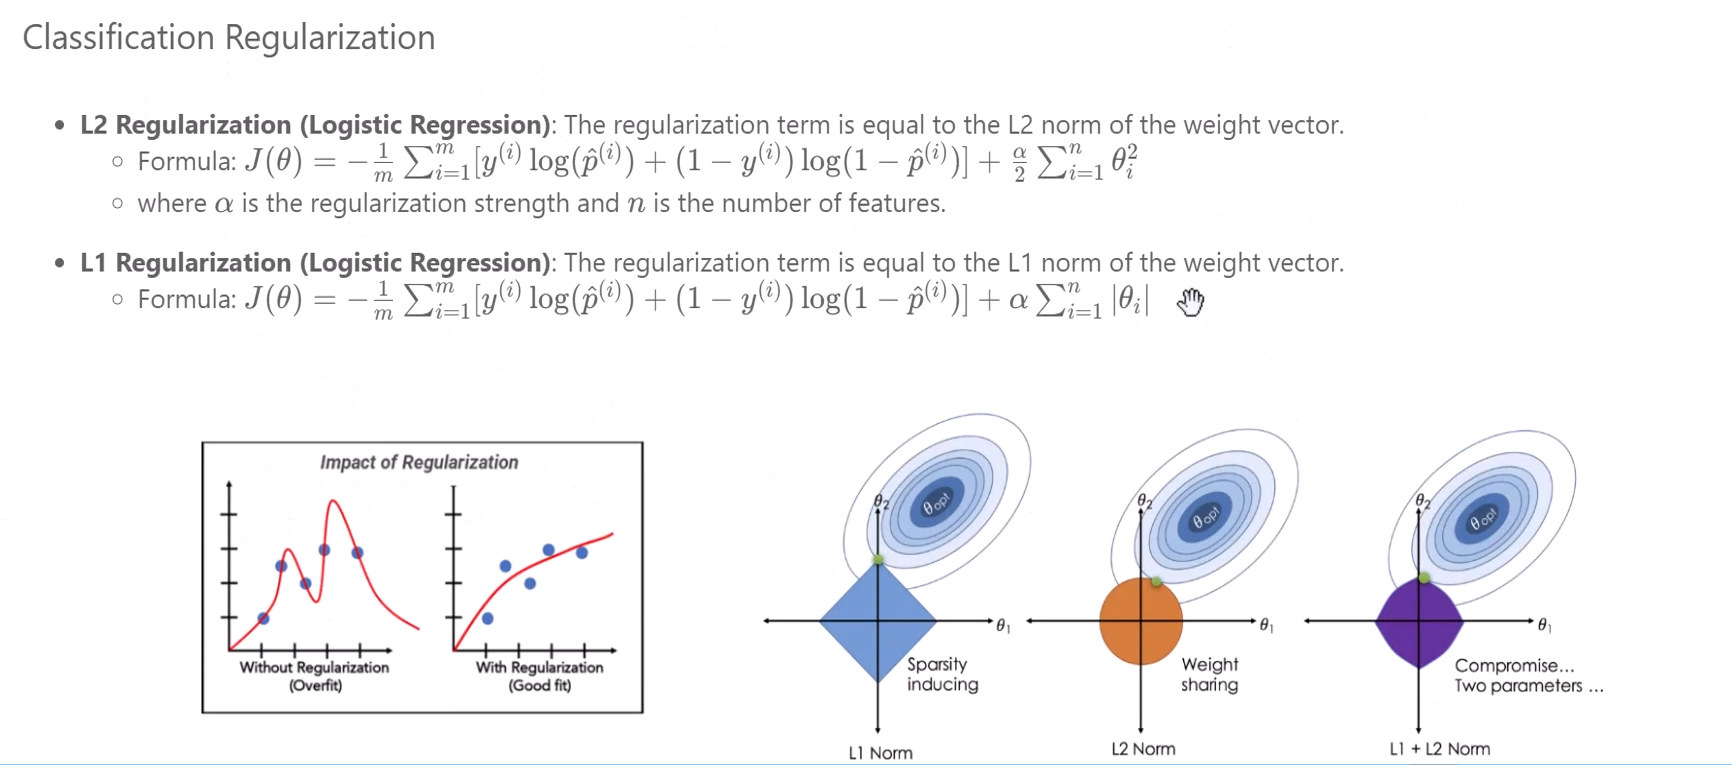

In [25]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc


In [2]:
data = load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X, y = data.data, data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [7]:
y_pred = model.predict(X_test)

In [8]:
con = confusion_matrix(y_test, y_pred)
con

array([[ 59,   4],
       [  1, 107]], dtype=int64)

In [9]:
acc = accuracy_score(y_test, y_pred)
acc

0.9707602339181286

In [10]:
y_prob = model.predict_proba(X_test)[:,1]

In [12]:
import pandas as pd

pd.DataFrame([y_pred, y_prob]).T.head().style.format({1: "{:.9f}"})

,0,1
0,1.000000,0.871001142
1,0.000000,0.000000005
2,0.000000,0.006840313
3,1.000000,0.996548414
4,1.000000,0.998630052


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix:
 [[ 59   4]
 [  1 107]]
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

ROC and AUC Score: 0.996766607877719


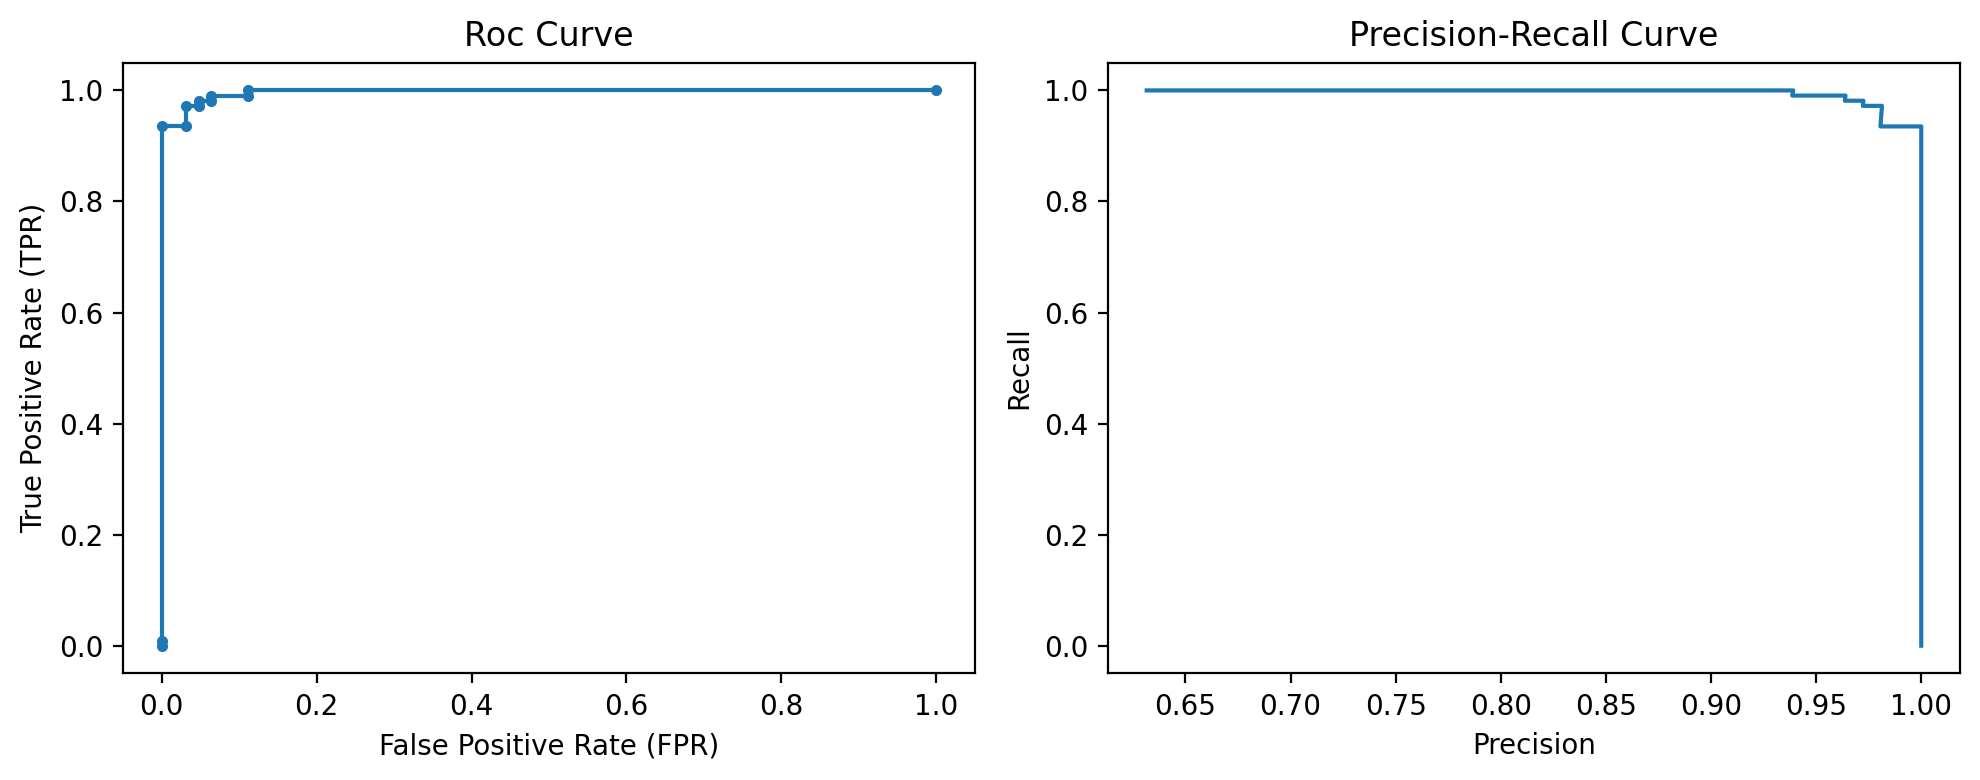

In [36]:
def evalueate_classification(y_true, y_pred, y_prob):
        print("confusion_matrix:\n", confusion_matrix(y_true, y_pred))
        print("classification_report:\n", classification_report(y_true, y_pred))

        roc_auc = roc_auc_score(y_true, y_prob)
        print("ROC and AUC Score:", roc_auc)

        fpr, tpr, _ = roc_curve(y_true, y_prob)
        precision, recall, _ = precision_recall_curve(y_true, y_prob)

        plt.figure(figsize = (10,4), dpi = 200)
        plt.subplot(1,2,1)
        plt.plot(fpr, tpr, marker = '.')
        plt.title("Roc Curve")
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')



        plt.subplot(1,2,2)
        plt.plot(precision, recall)
        plt.title("Precision-Recall Curve")
        plt.xlabel('Precision')
        plt.ylabel('Recall')

        plt.tight_layout()
        plt.show()

evalueate_classification(y_test, y_pred, y_prob)

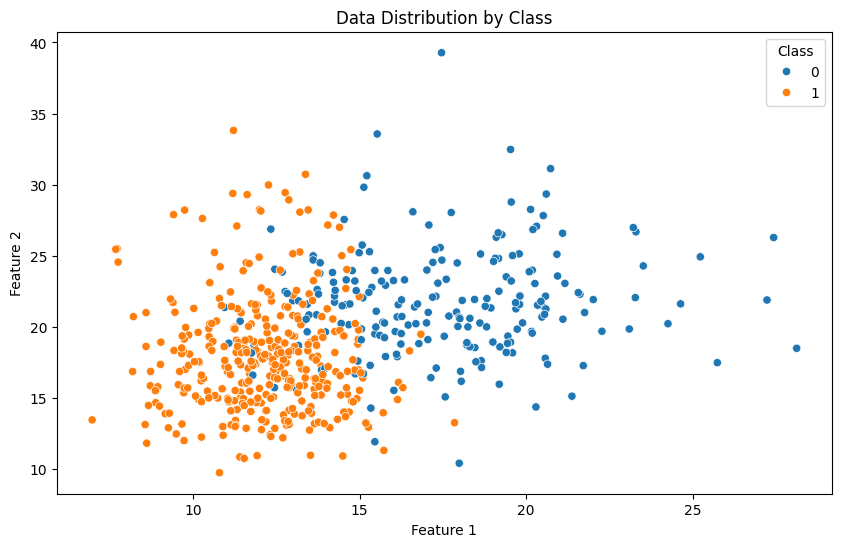

In [38]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Distribution by Class')
plt.legend(title='Class')
plt.show()

# Regularization

confusion_matrix:
 [[ 61   2]
 [  2 106]]
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC and AUC Score: 0.9976484420928865


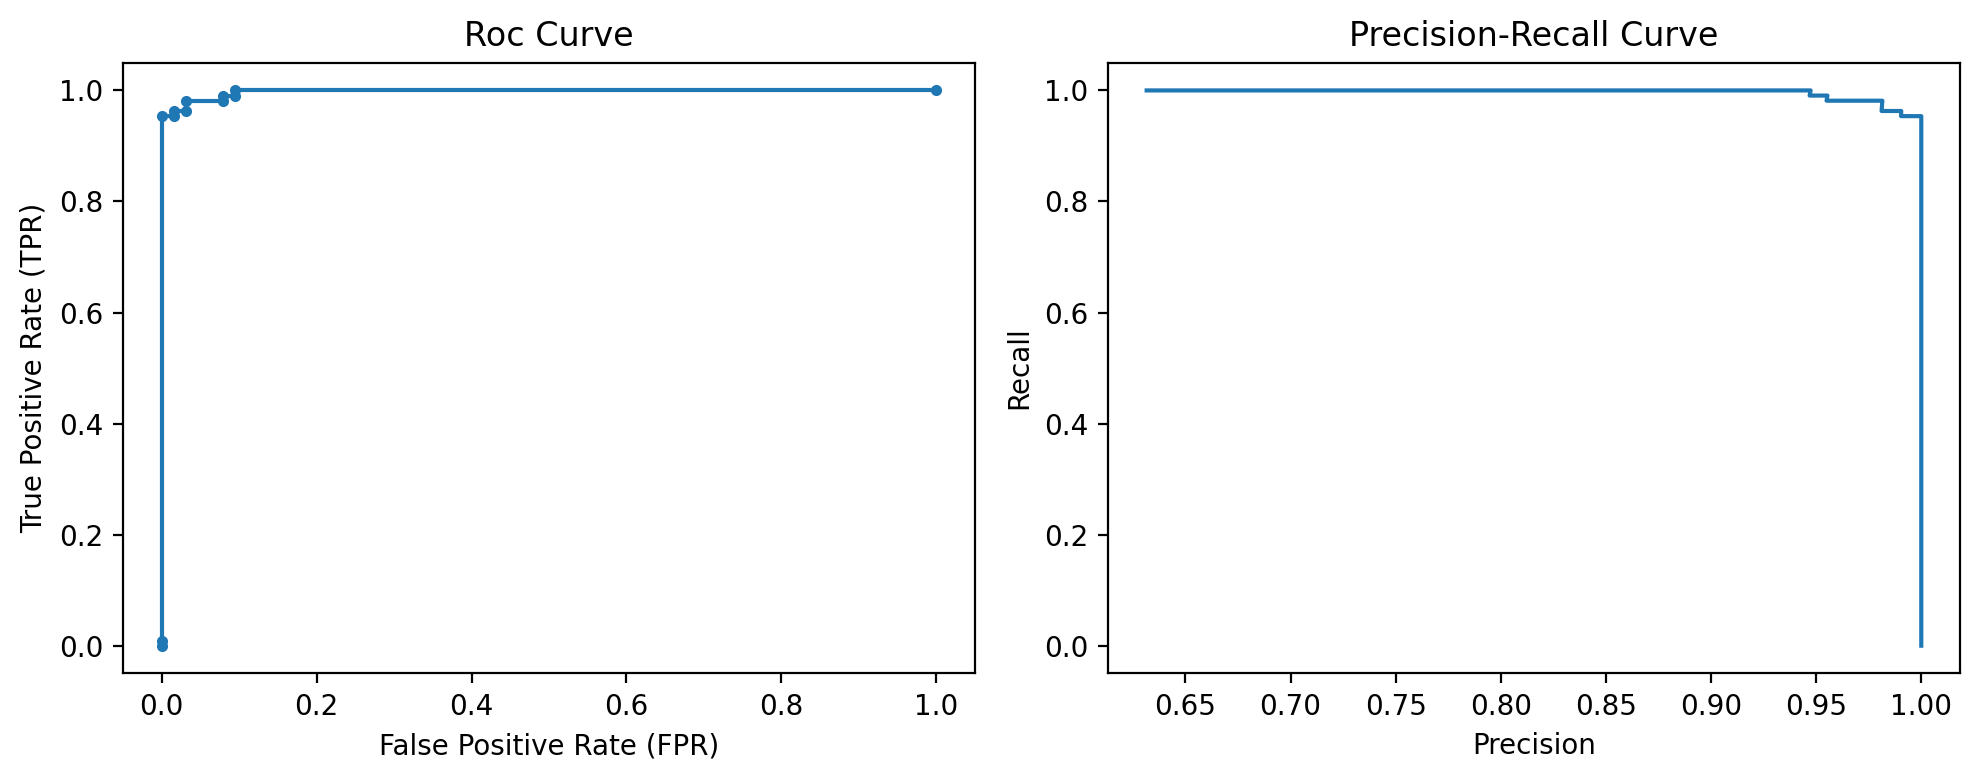

In [40]:
model = LogisticRegression(max_iter=10000, penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evalueate_classification(y_test, y_pred, y_prob)

confusion_matrix:
 [[ 59   4]
 [  2 106]]
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC and AUC Score: 0.997501469723692


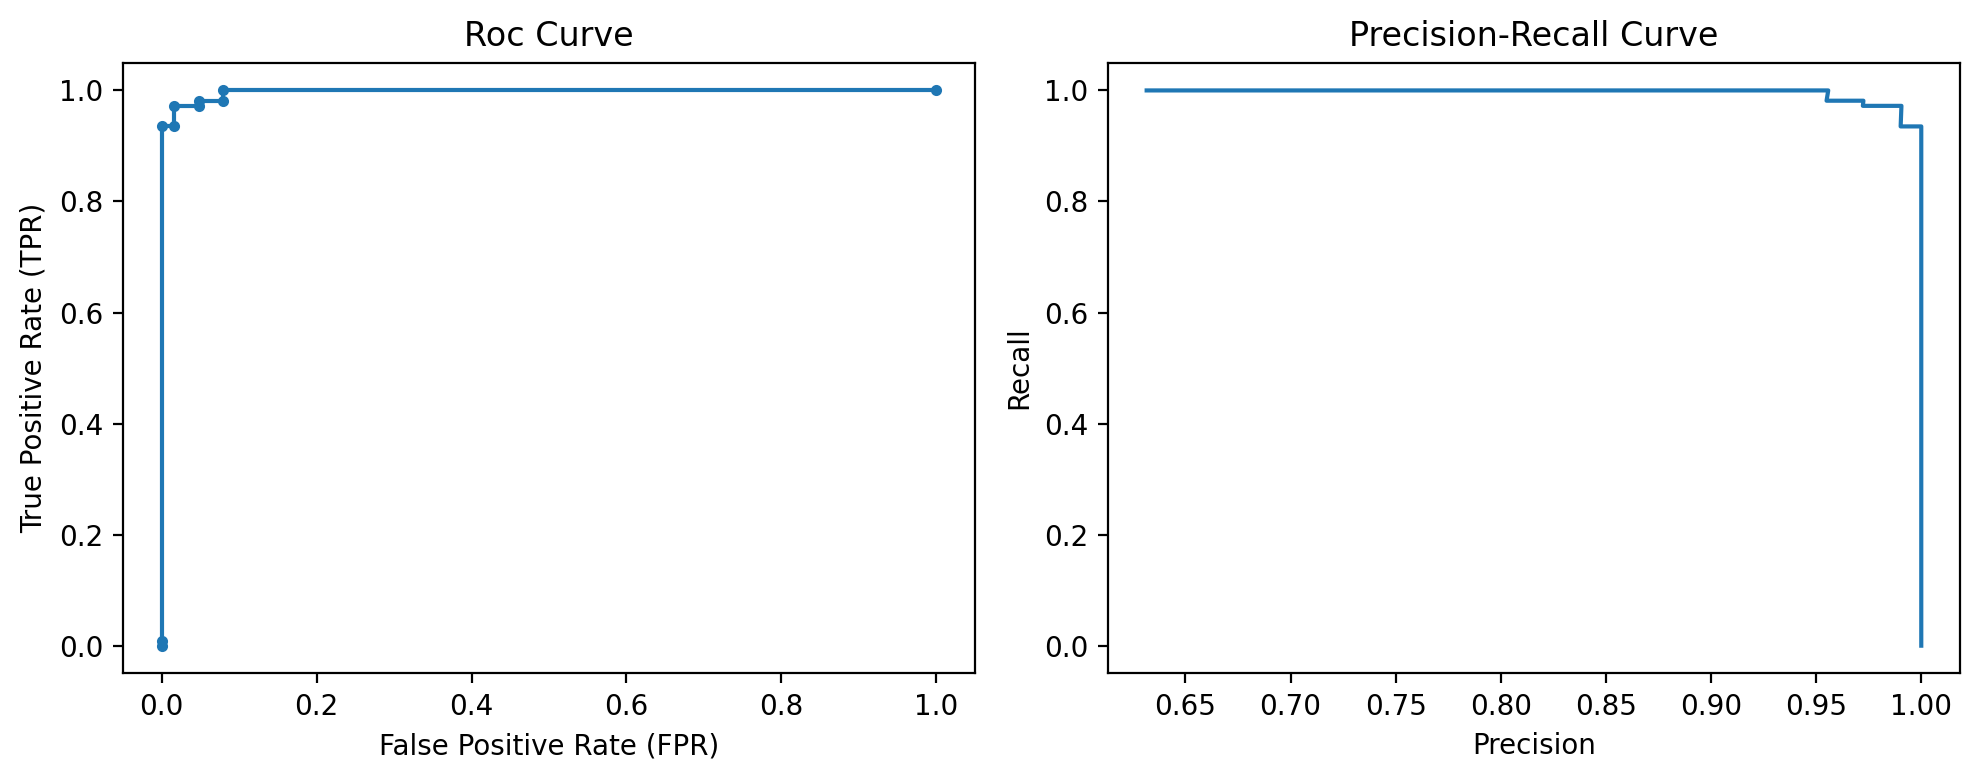

In [42]:
model = LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evalueate_classification(y_test, y_pred, y_prob)

confusion_matrix:
 [[ 58   5]
 [  1 107]]
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

ROC and AUC Score: 0.993533215755438


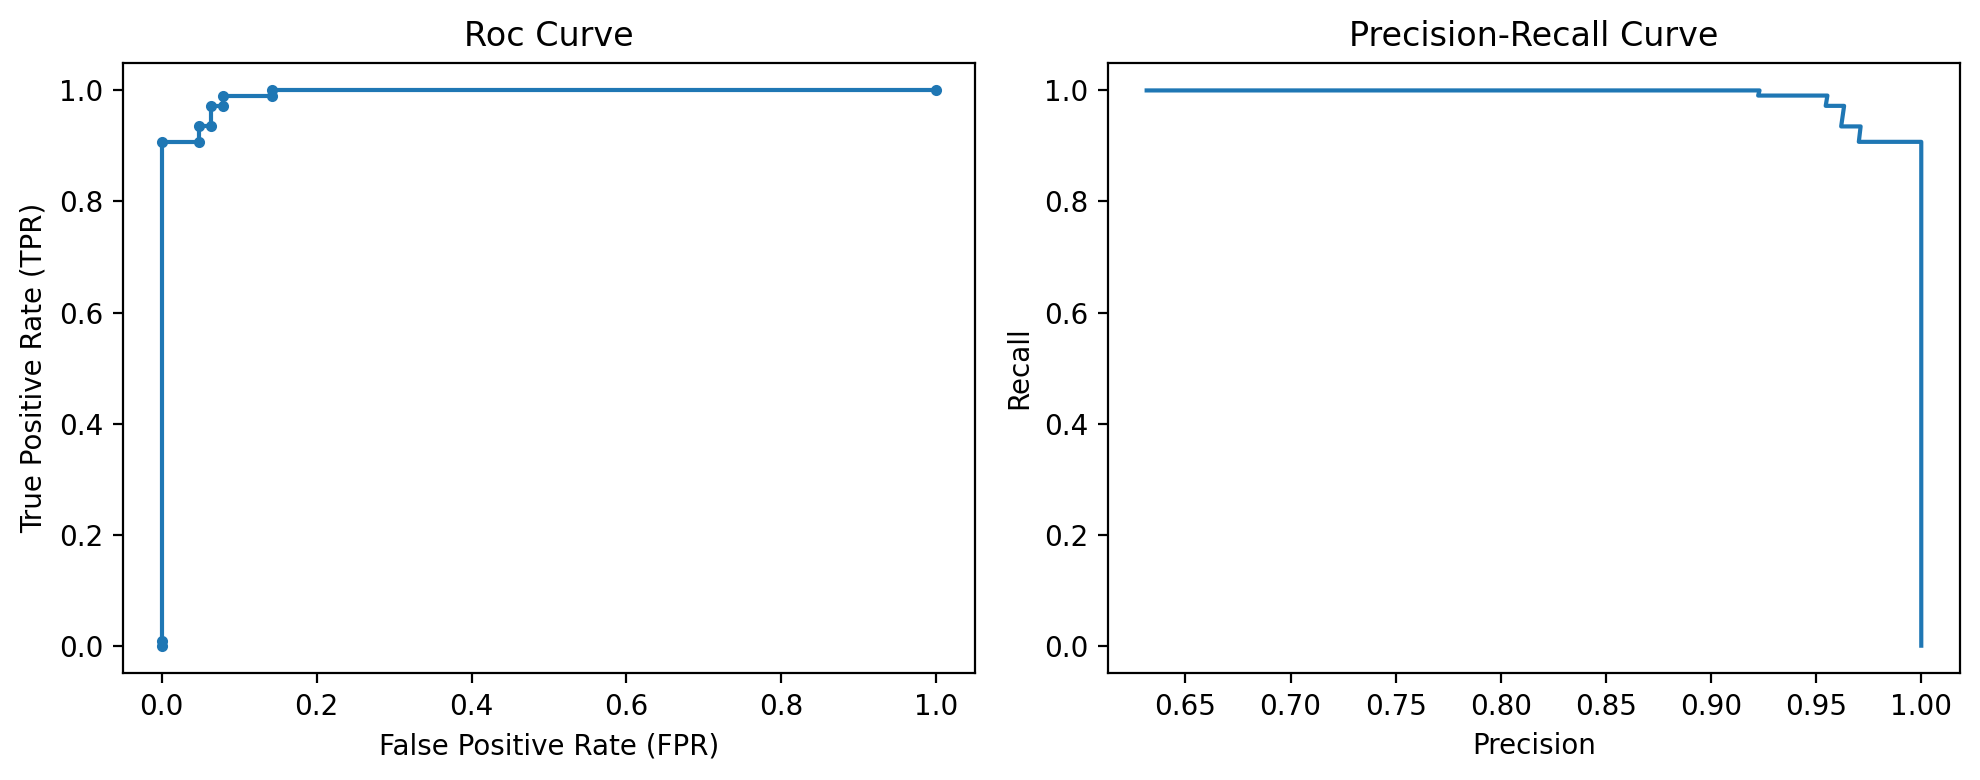

In [44]:
model = LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evalueate_classification(y_test, y_pred, y_prob)